In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nomeArquivo = "saidaPrioridades" #Sem extensao
df = pd.read_table (nomeArquivo+".txt", sep='\s+')
df["tempoTotal"] = df.apply (lambda row: row["Recebido"] - row["Enviado"], axis=1)
df["tempoRegra"] = df.apply (lambda row: row["tempoTotal"] / row["Regras"], axis=1)
df.set_index(['Execucao', 'Regras','Indice'], inplace=True)
#df.set_index(['Execucao', 'Regras'], inplace=True) 
df

Enviado     Recebido   tempoTotal  tempoRegra
Execucao Regras Indice                                                   
1        250    1          5.612641    11.043818     5.431177    0.021725
         500    1         14.222589    25.319847    11.097258    0.022195
         750    1         28.585706    49.612605    21.026899    0.028036
         1000   1         52.963444    88.334812    35.371368    0.035371
         1250   1         91.775447   145.356512    53.581065    0.042865
         1500   1        148.876425   217.588728    68.712303    0.045808
         1750   1        221.246252   333.358821   112.112569    0.064064
         2000   1        337.111973   511.148188   174.036215    0.087018
         2250   1        515.058333   822.158933   307.100600    0.136489
2        250    1          6.752952    11.785520     5.032568    0.020130
         500    1         14.963521    25.860348    10.896827    0.021794
         750    1         29.118714    47.131351    18.012637    0.024017
         1000   1         50.478851    79.564006    29.085155    0.029085
         1250   1         83.009801   131.676274    48.666473    0.038933
         1500   1        135.212412   209.104492    73.892080    0.049261
         1750   1        212.759158   319.609340   106.850182    0.061057
         2000   1        323.382483   487.290639   163.908156    0.081954
         2250   1        491.203452   784.011064   292.807612    0.130137
3        250    1         14.507943    19.024371     4.516428    0.018066
         500    1         22.199376    32.595631    10.396255    0.020793
         750    1         35.853900    54.517042    18.663142    0.024884
         1000   1         57.860855    91.368919    33.508064    0.033508
         1250   1         94.806978   146.174264    51.367286    0.041094
         1500   1        149.700266   226.790755    77.090489    0.051394
         1750   1        230.407481   340.353630   109.946149    0.062826
         2000   1        344.071538   514.602126   170.530588    0.085265
         2250   1        518.428447   794.177041   275.748594    0.122555
1        250    2          4.962562    53.318269    48.355707    0.193423
         500    2         54.492926   252.827020   198.334094    0.396668
         750    2        254.086948   625.620549   371.533601    0.495378
...                             ...          ...          ...         ...
3        1750   2       3007.649395  4240.994038  1233.344643    0.704768
         2000   2       4242.694774  5906.696519  1664.001745    0.832001
         2250   2       5908.606275  8704.719108  2796.112833    1.242717
1        250    3          3.113253    31.055929    27.942676    0.111771
         500    3         32.231485   141.528790   109.297305    0.218595
         750    3        142.794939   347.579755   204.784816    0.273046
         1000   3        348.923430   642.064747   293.141317    0.293141
         1250   3        643.513361  1031.990364   388.477003    0.310782
         1500   3       1033.523259  1526.717225   493.193966    0.328796
         1750   3       1528.344525  2134.185409   605.840884    0.346195
         2000   3       2135.913084  2945.923927   810.010843    0.405005
         2250   3       2947.763565  4564.297949  1616.534384    0.718460
2        250    3          1.618548    30.412299    28.793751    0.115175
         500    3         31.586070   143.698398   112.112328    0.224225
         750    3        144.957655   339.260991   194.303336    0.259071
         1000   3        340.609943   636.883807   296.273864    0.296274
         1250   3        638.340852  1026.356668   388.015816    0.310413
         1500   3       1027.892877  1533.249213   505.356336    0.336904
         1750   3       1534.904169  2165.321929   630.417760    0.360239
         2000   3       2167.092467  3041.898314   874.805847    0.437403
         2250   3       3043.806969  4535.774730  1491.967761    0.663097
3        250    3          5.860

In [3]:
gpb = df.groupby (["Regras","Indice"])
#gpb = df.groupby (["Regras"])

In [4]:
# Função para cálculo do intervalo de confiança de 95%
def confinterval (data):
    confidence = 0.95
    return st.sem (data) * st.t.ppf ((1 + confidence) / 2.0, len (data) - 1);

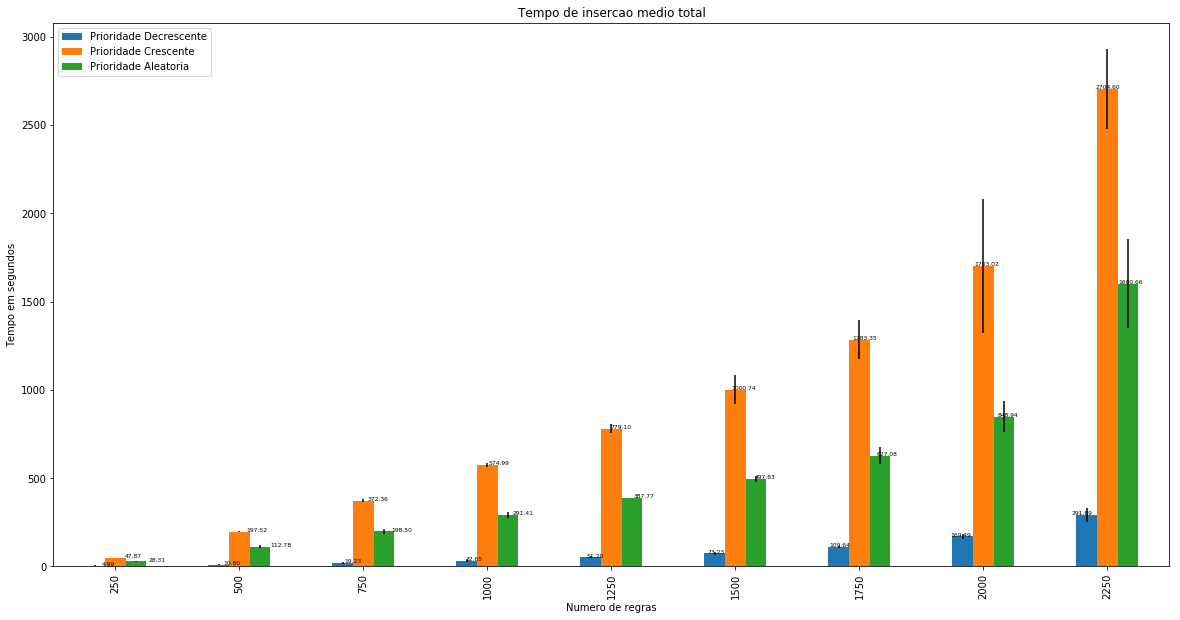

In [5]:
# Grafico da porcentagem de perda de pacotes em relação aos pacotes transmitidos no slice
err = gpb.aggregate(confinterval)
media = gpb.mean()
err = err.filter(items=['tempoTotal'])
media = media.filter(items=['tempoTotal'])
media.unstack().sort_values(by=["Regras"]).plot (kind='bar', yerr=err.unstack(), title="Tempo de insercao medio total", rot=90, figsize=(20,10))
plt.xlabel('Numero de regras')
plt.ylabel('Tempo em segundos')
#for i, v in enumerate(media['tempoRegra']):
#    plt.text(i-0.1,0.02, str("%.3f" %v), color='black', fontweight='bold', rotation=90, size=6) #i-0.5 v+1
 
posx = -0.30
for i in range(len(media)):
    if i%3 == 0 and i != 0:
        posx += 0.60
    else:
        posx += 0.189
    texto = "%.2f" % (media['tempoTotal'][i])
    plt.text(x = posx , y = media['tempoTotal'][i]+0.005, s = texto, size = 6)

#props = dict(boxstyle='round', facecolor='blue', alpha=0.15)
#ax=plt.gca()
#ax.text(0.015, 0.95, '1- Insercao Normal\n2- Insercao com prioridade decrescente\n3- Insercao com prioridade crescente', transform=ax.transAxes, fontsize=14,
#        verticalalignment='top', bbox=props)
#plt.gca().legend(['Insercao Normal','Insercao com prioridade decrescente','Insercao com prioridade crescente'])
plt.gca().legend(['Prioridade Decrescente', 'Prioridade Crescente', 'Prioridade Aleatoria'],loc="upper left")
plt.savefig(nomeArquivo+".pdf")
plt.show()